In [2]:
#importamos las librerias necesarias
import pandas as pd
import glob
import os

#Recuperamos todos los ficheros que tenemos guardados de enfermedades

path = 'C:/temp/td'    #librería donde tengas los datasets creados anteriormente
fmask = os.path.join(path, '*.csv')


# Primero especificamos un patrón del archivo y lo pasamos como parámetro en la función glob
csv_files = glob.glob(fmask)

# Mostrar el archivo csv_files, el cual es una lista de nombres
print(csv_files)

['C:/temp/td\\AER_for_2017-Zika-virus-disease.csv', 'C:/temp/td\\chikungunya-annual-epidemiological-report-2018.csv', 'C:/temp/td\\chikungunya-virus-disease-annual-epidemiological-report-2017.csv', 'C:/temp/td\\dengue-annual-epidemiological-report-2017.csv', 'C:/temp/td\\dengue-annual-epidemiological-report-2018.csv', 'C:/temp/td\\Zika-annual-epidemiological-report-2018.csv']


In [3]:
#Función para cambiar las columnas de nombre, ya que muchas son iguales y para especificar enfermedad en la columna
#Así conoceremos a qué enfermedad pertenece cada columna
def Changed_Column(table, w_filename):
    
    #Cambiamos todos los que tengan 'Reported cases' a 'Reported'
    table.rename(columns=lambda x: x.replace('Reported cases', 'Reported'), inplace=True)

    #Evaluamos las 3 enfermedades que tenemos.Según la enfermedad y como todas tienen la columna 'Reported', renombramos
    #dicha columna con el nombre de la enfermedad que toca.
    if w_filename.count('Zika') > 0:
         #Algunos registros de Zika tienen el año por delante, es decir la columna se llama '2015 Reported cases_2015'
         #Nos recorremos las columnas para eliminar toda la anterior a '_' ya que tiene años
         for i in table.columns[1:]:
            table.rename(columns=lambda x: x.replace(i.split('_')[0], 'Zika'), inplace=True)
        
         #table.rename(columns=lambda x: x.replace('Reported', 'Zika'), inplace=True)
    elif w_filename.count('dengue') > 0:
         table.rename(columns=lambda x: x.replace('Reported cases', 'Reported'), inplace=True)
         table.rename(columns=lambda x: x.replace('Reported', 'Dengue'), inplace=True)
         #Renombramos 'Confirmed cases' y la ponemos igual que en el caso del Chikunbunya a 'Confirmed' a secas
         table.rename(columns=lambda x: x.replace('Confirmed cases', 'Confirmed'), inplace=True)
    elif w_filename.count('chikungunya') > 0:
         table.rename(columns=lambda x: x.replace('Reported', 'Chikungunya'), inplace=True)
            
    #No todos los datasets tiene 'Rate' por tanto si con tienen este en particular es que tiene varios.
    #Eliminamos todos los Rate. Evaluamos el año porque tenenmos a partir del año 4 años atrás, por tanto 
    #los ficheros de 2018  empiezan en 2014 y los de 2017 en 2013
    if 'Rate_2016' in table.columns:
        if w_filename.count('2018'):
            # Nos guardamos el número anterior donde se encuentra 'Rate_2014', para poder eliminarlo
            num = table.columns.get_loc('Rate_2014') - 1
            
            # Nos guardamos el número anterior donde se encuentra 'ASR_2018', justo es donde tendremos 'Rate_2018'
            max = table.columns.get_loc('ASR_2018') - 1
            
            #Recorremos cada dos ya que tenemos Reported y Rate del mismo año.
            #empezamos por Rate_2018 y vamos hacia atrás para eliminar las últimas columnas primero (así no tendremos
            #problemas con número de columna, ya que si eliminamos una primera (la 2 por ejemplo), la numeración cambia)
            for i in range(max, num, -2):
                del table[table.columns[i]]

        elif w_filename.count('2017'):
            ## Nos guardamos el número anterior donde se encuentra 'Rate_2013', para poder eliminarlo
            num = table.columns.get_loc('Rate_2013') - 1
            
            # Nos guardamos el número anterior donde se encuentra 'Confirmed', justo es donde tendremos 'Rate_2017'
            max = table.columns.get_loc('Confirmed') - 1

            #Recorremos cada dos ya que tenemos Reported y Rate del mismo año.
            #empezamos por Rate_2017 y vamos hacia atrás para eliminar las últimas columnas primero (así no tendremos
            #problemas con número de columna, ya que si eliminamos una primera (la 2 por ejemplo), la numeración cambia)
            for i in range(max, num, -2):
                del table[table.columns[i]]
    
    #Eliminanos la columna 'Confirmed' quien la tenga          
    if 'Confirmed' in table.columns:
        del table[table.columns[table.columns.get_loc('Confirmed')]]
    
    #Eliminanos la columna 'ASR_2018' quien la tenga  
    if 'ASR_2018' in table.columns:
        del table[table.columns[table.columns.get_loc('ASR_2018')]]
 
                
    #retornamos la tabla           
    return table

In [4]:

# Escribimos un loop que irá a través de cada uno de los nombres de archivo

for i, filename in enumerate(csv_files):
        if i == 0:
            #la primera vez nos guardamos el dataset entero. Lo pasamos por la funcón creada por si ha de eliminar alguna
            #columna
            data = Changed_Column(pd.read_csv(filename, sep='\t', index_col=0), filename)
            
        else:    
            #La segunda vez pasamos el dataset por función creada para que elimine columnas no necesarias
            df2 = Changed_Column(pd.read_csv(filename, sep='\t', index_col=0), filename)
            #unimos los datasets
            data = pd.concat([data, df2], axis=1)

#Mostramos cabecera del dataset resultante de todos
data.head()

,Country,Zika_2015,Zika_2016,Zika_2017,Country,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Chikungunya_2018,...,Dengue_2014,Dengue_2015,Dengue_2016,Dengue_2017,Dengue_2018,Country,Zika_2015,Zika_2016,Zika_2017,Zika_2018
0,Austria,1,41,8,Austria,.,.,9,5,1,...,91,103,116,85,85,Austria,1,41,8,0
1,Belgium,1,120,42,Belgium,74,44,29,10,3,...,110,108,114,77,101,Belgium,1,120,42,2
2,Bulgaria,.,.,.,Bulgaria,.,.,.,.,.,...,.,.,.,.,.,Bulgaria,.,.,.,.
3,Croatia,.,.,0,Croatia,0,0,0,0,0,...,2,.,2,0,2,Croatia,.,.,0,0
4,Cyprus,.,.,.,Cyprus,.,.,.,.,.,...,.,.,.,.,.,Cyprus,.,.,.,.


In [5]:
#Vemos que hay columnas repetidas y de las repetidas hay una que no tiene datos en la última fila que corresponde a EU/EEA
data[['Zika_2015', 'Chikungunya_2014', 'Dengue_2016', 'Country','Dengue_2013']]

,Zika_2015,Zika_2015,Chikungunya_2014,Chikungunya_2014,Dengue_2016,Dengue_2016,Country,Country,Country,Country,Country,Country,Dengue_2013
0,1,1,.,.,116,116,Austria,Austria,Austria,Austria,Austria,Austria,89
1,1,1,74,74,114,114,Belgium,Belgium,Belgium,Belgium,Belgium,Belgium,139
2,.,.,.,.,.,.,Bulgaria,Bulgaria,Bulgaria,Bulgaria,Bulgaria,Bulgaria,.
3,.,.,0,0,2,2,Croatia,Croatia,Croatia,Croatia,Croatia,Croatia,3
4,.,.,.,.,.,.,Cyprus,Cyprus,Cyprus,Cyprus,Cyprus,Cyprus,.
5,.,.,3,3,0,0,Czech Republic,Czech Republic,Czech Republic,Czech Republic,Czech Republic,Czech Republic,0
6,.,.,.,.,.,.,Denmark,Denmark,Denmark,Denmark,Denmark,Denmark,.
7,.,.,0,0,9,9,Estonia,Estonia,Estonia,Estonia,Estonia,Estonia,0
8,1,1,4,4,66,66,Finland,Finland,Finland,Finland,Finland,Finland,80
9,.,.,550,550,297,297,France,France,France,France,France,France,271


In [6]:
#Esto pasa porque como tenemos 4 años atrás tenemos datos duplicados, es decir, en 2017 tenemo Dengue_2016 pero en 2018 también
#pues al tratar 4 años atrás en cada fichero tenemos años duplicados.
#Por este motivo y para evitar columnas repetidas creamos una función que eliminará la columna repetida y se quedará con la que 
#tenga el mayor número de datos informados (observar que en Zinka_2015 una columna no tiene datos para EU/EEA y otra sí,
#nos interesa quedarnos con la que tiene dato)

#Creamos función borrado de dulicados: introducimos las dos tablas que queremos unir
def Delete_duplicated(table1, table2):

    #Para cada columna de la segunda tabla (que es la más pequeña) la comparamos con todas las columnas de la tabla1
    for i2 in table2.columns:
        for i1 in table1.columns:
            #si los elementos que comparamos son iguales
            if i1 == i2:
                #miramos longitud de filas: eliminamos columna de la tabla que tenga la longitud más pequeña
                if table1.shape[0] < table2.shape[0]:
                    del table1[table1.columns[table1.columns.get_loc(i1)]]

                elif table2.shape[0] < table1.shape[0]:
                    del table2[table2.columns[table2.columns.get_loc(i1)]]

                else:
                    #en caso de ser iguales eliminamos los datos de la primera tabla
                    del table1[table1.columns[table1.columns.get_loc(i1)]]
    
    #devolvemos las tablas
    return table1, table2

In [7]:
#Volvemos a realizar el proceso pero esta vez llamando a la nueva función creada

# Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes

for i, filename in enumerate(csv_files):
    if not filename.count('desastres') > 0:
        if i == 0:
            data = Changed_Column(pd.read_csv(filename, sep='\t', index_col=0), filename)
            
        else:    
            df2 = Changed_Column(pd.read_csv(filename, sep='\t', index_col=0), filename)
            data, df2 = Delete_duplicated(data, df2)
            data = pd.concat([data, df2], axis=1)

#Para chequear que todo está bien, mostramos la list_data por consola
data.head()

,Chikungunya_2018,Chikungunya_2013,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Dengue_2013,Dengue_2014,Dengue_2015,Dengue_2016,Dengue_2017,Dengue_2018,Country,Zika_2015,Zika_2016,Zika_2017,Zika_2018
0,1,0,.,.,9,5,89,91,103,116,85,85,Austria,1,41,8,0
1,3,7,74,44,29,10,139,110,108,114,77,101,Belgium,1,120,42,2
2,.,.,.,.,.,.,.,.,.,.,.,.,Bulgaria,.,.,.,.
3,0,0,0,0,0,.,3,2,.,2,0,2,Croatia,.,.,0,0
4,.,.,.,.,.,.,.,.,.,.,.,.,Cyprus,.,.,.,.


In [8]:
#Vemos que ahora no tenemos datos duplicados
data[['Zika_2015', 'Chikungunya_2014', 'Dengue_2016', 'Country','Dengue_2013']]

,Zika_2015,Chikungunya_2014,Dengue_2016,Country,Dengue_2013
0,1,.,116,Austria,89
1,1,74,114,Belgium,139
2,.,.,.,Bulgaria,.
3,.,0,2,Croatia,3
4,.,.,.,Cyprus,.
5,.,3,0,Czech Republic,0
6,.,.,.,Denmark,.
7,.,0,9,Estonia,0
8,1,4,66,Finland,80
9,.,550,297,France,271


In [9]:
#Reordenamos por nombre las columnas
data.reindex(sorted(data.columns), axis=1).head()

#Ponemos la primera columna Country
country = data['Country']
data.drop(labels=['Country'], axis=1,inplace = True)
data.insert(0, 'Country', country)

#muestra dataset final
data.head()

,Country,Chikungunya_2018,Chikungunya_2013,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Dengue_2013,Dengue_2014,Dengue_2015,Dengue_2016,Dengue_2017,Dengue_2018,Zika_2015,Zika_2016,Zika_2017,Zika_2018
0,Austria,1,0,.,.,9,5,89,91,103,116,85,85,1,41,8,0
1,Belgium,3,7,74,44,29,10,139,110,108,114,77,101,1,120,42,2
2,Bulgaria,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.
3,Croatia,0,0,0,0,0,.,3,2,.,2,0,2,.,.,0,0
4,Cyprus,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.


In [10]:
# Lo guardamos en csv

filename = 'enfermedades.csv'
data.to_csv(filename,  sep='\t', encoding='utf-8')
print('Guardado csv: ', filename)

print('\n\n Ya puedes analizar diferentes enfermedades\n\n --\t DISFRUTA  ---')

Guardado csv:  enfermedades.csv


 Ya puedes analizar diferentes enfermedades

 --	 DISFRUTA  ---


In [11]:
#Veamos primeramente las características del DataSet
#===================================================
print("Número de columnas",len(data.axes[1]))
print("Número de filas", len(data))
print ("Atributos", data.axes[1])

#Procedemos con la limpieza de datos.
#Observamos que existen valores nan y '.' que reemplazamos por 0 en este caso.
data=data.replace({'.':0})
data=data.fillna(0)
data.head()

Número de columnas 17
Número de filas 32
Atributos Index(['Country', 'Chikungunya_2018', 'Chikungunya_2013', 'Chikungunya_2014',
       'Chikungunya_2015', 'Chikungunya_2016', 'Chikungunya_2017',
       'Dengue_2013', 'Dengue_2014', 'Dengue_2015', 'Dengue_2016',
       'Dengue_2017', 'Dengue_2018', 'Zika_2015', 'Zika_2016', 'Zika_2017',
       'Zika_2018'],
      dtype='object')


,Country,Chikungunya_2018,Chikungunya_2013,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Dengue_2013,Dengue_2014,Dengue_2015,Dengue_2016,Dengue_2017,Dengue_2018,Zika_2015,Zika_2016,Zika_2017,Zika_2018
0,Austria,1,0,0,0,9,5,89,91,103,116,85,85,1,41,8,0
1,Belgium,3,7,74,44,29,10,139,110,108,114,77,101,1,120,42,2
2,Bulgaria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Croatia,0,0,0,0,0,0,3,2,0,2,0,2,0,0,0,0
4,Cyprus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
import pandas as pd
#Tranformación del dataset
#=========================
#Tranformamos los valores de str a int.
#Para Chikungunya
c13=data['Chikungunya_2013']=data['Chikungunya_2013'].tolist()#Obtenemos listas por columnas
c14=data['Chikungunya_2014']=data['Chikungunya_2014'].tolist()
c15=data['Chikungunya_2015']=data['Chikungunya_2015'].tolist()
c16=data['Chikungunya_2016']=data['Chikungunya_2016'].tolist()
c17=data['Chikungunya_2017']=data['Chikungunya_2017'].tolist()
c18=data['Chikungunya_2018']=data['Chikungunya_2018'].tolist()

c13=list(map(int,c13))#Transformamos str to int
c14=list(map(int,c14))
c15=list(map(int,c15))
c16=list(map(int,c16))
c17=list(map(int,c17))
c18=list(map(int,c18))

data['Chikungunya_2013']=c13 #Transformamos el dataset "data original"
data['Chikungunya_2014']=c14
data['Chikungunya_2015']=c15
data['Chikungunya_2016']=c16
data['Chikungunya_2017']=c17
data['Chikungunya_2018']=c18

#Para Dengue
d13=data['Dengue_2013']=data['Dengue_2013'].tolist()#Obtenemos listas por columnas
d14=data['Dengue_2014']=data['Dengue_2014'].tolist()
d15=data['Dengue_2015']=data['Dengue_2015'].tolist()
d16=data['Dengue_2016']=data['Dengue_2016'].tolist()
d17=data['Dengue_2017']=data['Dengue_2017'].tolist()
d18=data['Dengue_2018']=data['Dengue_2018'].tolist()



d13=list(map(int,d13))#Transformamos str to int
d14=list(map(int,d14))
d15=list(map(int,d15))
d16=list(map(int,d16))
d17=list(map(int,d17))
d18=list(map(int,d18))


data['Dengue_2013']=d13#Transformamos el dataset "data original"
data['Dengue_2014']=d14
data['Dengue_2015']=d15
data['Dengue_2016']=d16
data['Dengue_2017']=d17
data['Dengue_2018']=d18

#Para Zika

z15=data['Zika_2015']=data['Zika_2015'].tolist()#Obtenemos listas por columnas
z16=data['Zika_2016']=data['Zika_2016'].tolist()
z17=data['Zika_2017']=data['Zika_2017'].tolist()
z18=data['Zika_2018']=data['Zika_2018'].tolist()

z15=list(map(int,z15))#Transformamos str to int
z16=list(map(int,z16))
z17=list(map(int,z17))
z18=list(map(int,z18))

data['Zika_2015']=z15#Transformamos el dataset "data original"
data['Zika_2016']=z16
data['Zika_2017']=z17
data['Zika_2018']=z18

df=data.loc[(data["Country"]=='Spain')|(data["Country"]=='Italy')|(data["Country"]=='Germany')|(data["Country"]=='Belgium'),:]
df.head()



,Country,Chikungunya_2018,Chikungunya_2013,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Dengue_2013,Dengue_2014,Dengue_2015,Dengue_2016,Dengue_2017,Dengue_2018,Zika_2015,Zika_2016,Zika_2017,Zika_2018
1,Belgium,3,7,74,44,29,10,139,110,108,114,77,101,1,120,42,2
10,Germany,26,16,162,110,74,33,877,626,722,958,635,613,0,0,69,18
15,Italy,4,3,39,18,17,289,142,79,103,106,95,108,0,101,25,2
28,Spain,27,2,272,234,105,51,0,0,168,261,128,181,10,301,44,9


    Country  Chikungunya_2018  Dengue_2018  Zika_2018
1   Belgium                 3          101          2
10  Germany                26          613         18
15    Italy                 4          108          2
28    Spain                27          181          9


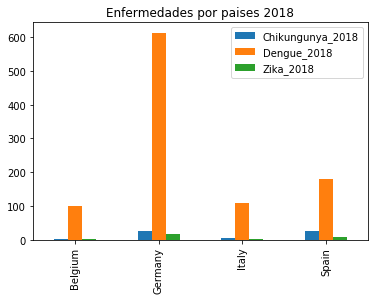

In [15]:
#Comparativa de paises elegidos en 2018
#======================================
#Importamos librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(4)

df18=df.loc[:,['Country','Chikungunya_2018','Dengue_2018','Zika_2018']]#Nos quedamos con los campos de enf en el 2018
print(df18)
df18.plot(kind='bar',use_index=False,title= 'Enfermedades por paises 2018',legend=True)#Dibujamos el gráfico
plt.xticks(x, ('Belgium', 'Germany','Italy','Spain'))
plt.show()


**ENFERMEDADES POR PAISES EN 2018**

**================================**

En relación al dataset estudiado, y teniendo en cuenta que la información contenida fue registrada entre los años 2013 y 2018, vamos a estudiar en primer lugar la incidencia de infecciones por picadura de mosquito (Chikungunya, Dengue y Zika) en Bélgica, Alemania, Italia y España en el año 2018.(Registros más recientes).

Observamos una **mayor incidencia de casos de Dengue en todos los países siendo Alemania el país con más número de registros seguido de España.**
La enfermedad con **menor incidencia es Zika.**


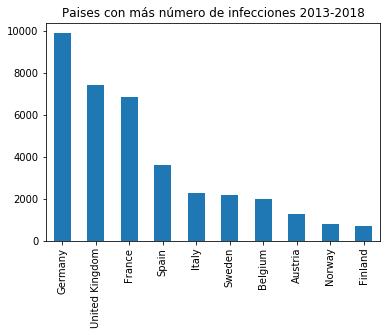

In [103]:
#Infecciones cómputo glogal 2013- 2018 por paises
#================================================
data.head()
#Nuestro dataset numérico
data_num=data.drop(['Country'],axis=1)
data_num['Sum']=np.sum(data,axis=0)#Creamos una columna con el total

#Lista de paises
countries=data['Country'].tolist()
#Listas de enfermedades por años=Atributos del data set
enf=data_num.columns.tolist()
enf=enf[0:-1]
enf
#En la columna 'Sum' creada se sumas todas las infecciones por paises en el intervalo de tiempo 2013-2018
for i in range (len(data)):
    data.loc[i,'Sum']=data_num.iloc[i,:].sum()



#Seleccionamos los 10 paises con mayores infecciones derivadas de picaduras de mosquito.
data_top=data.sort_values('Sum',ascending=False)

#Seleccionamos los 10 paises con más infecciones entre los años 2013-2018
data_top10=data_top[1:11:]


#Hacemos un gráfico
paises_top10=data_top10['Country'].tolist()
x=np.arange(len(paises_top10))
data_top10['Sum'].plot(kind='bar',title="Paises con más número de infecciones 2013-2018")
plt.xticks(x, (paises_top10))
plt.show()

**PAISES CON MAYOER NÚMERO DE INFECCIONES**

**=========================================**

Por otro lado podría interesarnos obtener la lista de los 10 paises con un mayor número de casos de Chikungunya, Zika y Dengue para poder abastecer correctamente a la población con fármacos, o desarrollando vacunas como medida de prevención.

Observamos que **Alemania** es el país con mayor número de casos registrados entre los años 2013 y 2018, seguido por **UK, Francia , España e Italia.**
Se podría hacer un estudio sobre el turismo recibido en estos paises, sobre el que consumen sus propios habitantes,así como, sobre el estudio de la flora y fauna local, para de este modo, poder deducir patrones causa-efecto.

In [72]:
#Número de infecciones totales por enfermedades
#==============================================
data.head()
#Para Chikungunya
data['Chikungunya_total']=data[['Chikungunya_2018', 'Chikungunya_2013', 'Chikungunya_2014',
       'Chikungunya_2015', 'Chikungunya_2016', 'Chikungunya_2017']].sum(axis=1)
#Para Dengue
data['Dengue_total']=data[['Dengue_2013', 'Dengue_2014', 'Dengue_2015', 'Dengue_2016',
       'Dengue_2017', 'Dengue_2018']].sum(axis=1)

#Para Zika
data['Zika_total']=data[['Zika_2015', 'Zika_2016', 'Zika_2017',
       'Zika_2018']].sum(axis=1)

data.head()

,Country,Chikungunya_2018,Chikungunya_2013,Chikungunya_2014,Chikungunya_2015,Chikungunya_2016,Chikungunya_2017,Dengue_2013,Dengue_2014,Dengue_2015,...,Dengue_2017,Dengue_2018,Zika_2015,Zika_2016,Zika_2017,Zika_2018,Sum,Chikungunya_total,Dengue_total,Zika_total
0,Austria,1,0,0,0,9,5,89,91,103,...,85,85,1,41,8,0,1218,15,569,50
1,Belgium,3,7,74,44,29,10,139,110,108,...,77,101,1,120,42,2,1797,167,649,165
2,Bulgaria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Croatia,0,0,0,0,0,0,3,2,0,...,0,2,0,0,0,0,18,0,9,0
4,Cyprus,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


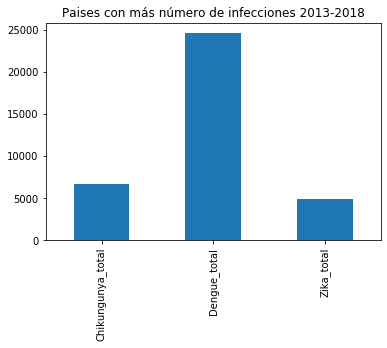

Chikungunya_total     6714
Dengue_total         24604
Zika_total            4948
dtype: int64


In [81]:
#Representamos gráficamente la información
#=========================================
data_enf_total=data.loc[:,['Chikungunya_total','Dengue_total','Zika_total']]
data_enf_total.sum().plot(kind='bar',title="Paises con más número de infecciones 2013-2018")
plt.show()
print(data_enf_total.sum())

Tal y como hemos podido comprobar en gráficos anteriores, hay un mayor incidencia de Dengue. La diferencia es notable en relación con las otras enfermedades estudiadas.

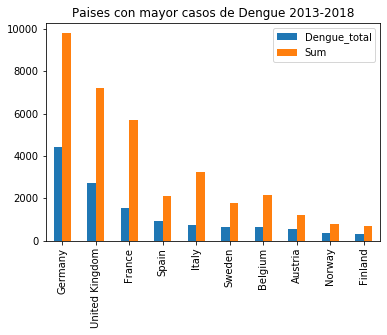

In [96]:
#Top 10 de paises con mayor casos en Dengue (comparado con el total de infecciones por paises)
#=============================================================================================
data_top_dengue=data.sort_values('Dengue_total',ascending=False)#El dataset con las columnas elegidas las ordenamos
                                                                #en orden descendente.
data_top_dengue.head()
data_top_dengue=data_top_dengue.iloc[1:11,:]#Nos quedamos con los 10 paises con mayor número de casos.
data_top_dengue

#Dibujamos el gráfico.
data_top_dengue[['Dengue_total','Sum']].plot(kind='bar',title="Paises con mayor casos de Dengue 2013-2018")
plt.xticks(x, (paises_top10))

plt.show()

Por otro lado, sería interesante obtener información sobre los paises más afectados por Dengue, ya que hemos comprobado que es la enfermedad con mayor incidencia.

Observamos que **Alemania** encabeza el ranking seguido por **UK, Francia, España e Italia**. También se evidencia el hecho de que en los paises más afectados por infecciones derivadas de picadura de mosquito, la **mitad de los casos diagnósticados son por Dengue**.

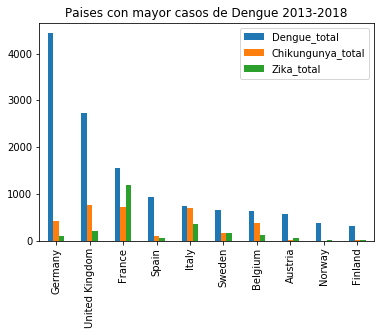

In [92]:
#Top 10 paises con mayor número de casos de Dengue y comparado con las otras infecciones
#=======================================================================================

data_top_dengue[['Dengue_total','Chikungunya_total','Zika_total']].plot(kind='bar',title="Paises con mayor casos de Dengue 2013-2018")
plt.xticks(x, (paises_top10))
plt.show()

Confirmando los resultados obtenidos anteriormente, el gráfico muestra los 10 países con mayor número de incidencia de enfermedades como Dengue, Chikungunya, y Zike, Siendo **Alemania** el país en el que consta mayor número de casos.

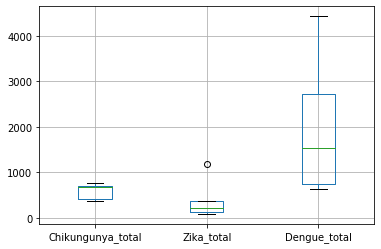

       Chikungunya_total   Zika_total  Dengue_total
count           5.000000     5.000000      5.000000
mean          591.600000   394.200000   2016.200000
std           181.944497   451.356511   1590.435695
min           370.000000    87.000000    633.000000
25%           421.000000   128.000000    738.000000
50%           691.000000   213.000000   1544.000000
75%           711.000000   364.000000   2735.000000
max           765.000000  1179.000000   4431.000000


In [120]:
#DESCRIPCIÓN ESTADÍSTICA POR ENFERMEDADES
#========================================
data_top5=data_top10.iloc[0:5,]
data_top5[['Chikungunya_total','Zika_total','Dengue_total']].boxplot()

plt.show()

print (data_top5[['Chikungunya_total','Zika_total','Dengue_total']].describe())

De entre los estadísticos que podrían darnos información sobre la incidencia de estas enfermedades en los 5 paises más afectados en los años 2013 y 2018, tenemos:

- Observamos que como media han padecido **Chikungunya 370 personas, Zika 394 y Dengue 2016.**
- Con un **máximo en casos de Dengue de 4431**, que prácticamente duplica la cantidad de casos de Zika y Chikunguya juntos.
- El 50% de los registros obtenidos se encuentran en el intervalo **[421,711] para Chikungunya, [128,364] para Zika y [738,2735] para Dengue.**